In [14]:
from collections import defaultdict
import networkx as nx


def explore(node,graph):
    while graph.out_degree(node) > 0:
        neighbor = next(graph.successors(node))
        
        graph.remove_edge(node, neighbor)
        explore(neighbor,graph)
    cycle.append(node)

def eulerian_cycle(graph):
    global cycle
    cycle = []

    # Choose a starting node arbitrarily
    start_node = next(iter(graph.nodes()))

    explore(start_node, graph)

    return cycle[::-1]

#G = nx.read_adjlist('dataset_30187_2 (1).txt',create_using=nx.DiGraph(), nodetype=int)
#nx.draw_networkx(G)

G_sample = {'A': ['B'], 'B': ['C'],'C':['A']}
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for node, neighbors in G_sample.items():
    G.add_node(node)
    for neighbor in neighbors:
        G.add_edge(node, neighbor)
result = eulerian_cycle(G)
print("Eulerian Cycle:", result)


Eulerian Cycle: ['A', 'B', 'C', 'A']


In [21]:
import re
def de_bruijn_graph_from_reads(reads, k):
    
    graph = nx.DiGraph()

    for read in reads:
        for i in range(len(read) - k + 1):
            kmer = read[i:i+k]
            prefix = kmer[:-1]
            suffix = kmer[1:]

            if graph.has_edge(prefix, suffix):
                graph[prefix][suffix]['weight'] += 1
            else:
                graph.add_edge(prefix, suffix, weight=1)

    return graph


def create_string_from_path(path):
    sequence = path[0]
    for node in path[1:]:
        sequence += node[-1]

    return sequence


In [22]:
def string_composition(k, text):
    compositions = []
    for i in range(len(text) - k + 1):
        kmer = text[i:i + k]
        compositions.append(kmer)
    return compositions

k = 12
text = "AAGATTCTCTAAGA"
#with open("dataset_30183_6 (1).txt", 'r') as file:
#        text = file.read()
#kmers = string_composition(k, text)
#print(kmers)

de_bruijn_graph = de_bruijn_graph_from_reads([text], k)
adj_list = nx.generate_adjlist(de_bruijn_graph)
#print(de_bruijn_graph.edges(data = True) )
for node in de_bruijn_graph.nodes():
    neighbors = de_bruijn_graph.neighbors(node)
    for v in neighbors:
        weight = de_bruijn_graph[node][v]['weight']
        repeated_neighbors = [v] * weight
        print(f"{node}: {', '.join(map(str, repeated_neighbors))}")

AAGATTCTCTA: AGATTCTCTAA
AGATTCTCTAA: GATTCTCTAAG
GATTCTCTAAG: ATTCTCTAAGA


[1, 2, 3, 4, 2, 1]


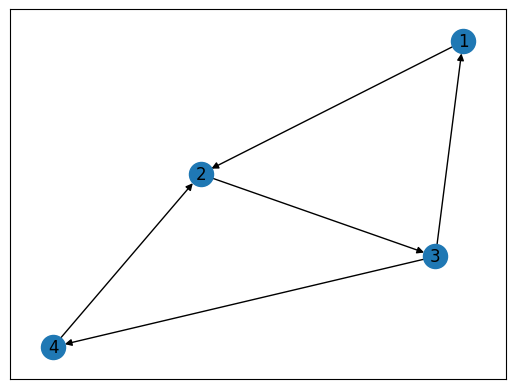

In [29]:
graph = nx.DiGraph()
graph.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 2)])
#graph = G.copy()
nx.draw_networkx(graph)
print(eulerian_cycle(graph))

In [35]:
import networkx as nx

def find_eulerian_path(graph):
    # Check if the graph is weakly connected (ignoring edge directions)
    if not nx.is_weakly_connected(graph):
        raise ValueError("The graph is not weakly connected.")

    # Count the in-degrees and out-degrees for each node
    in_degrees = graph.in_degree()
    out_degrees = graph.out_degree()

    # Count nodes with odd in-degrees and out-degrees
    odd_in_nodes = [node_in[0] for node_in, node_out in zip(in_degrees,out_degrees) if node_in[1] < node_out[1] ]
    odd_out_nodes = [node_in[0] for node_in, node_out in zip(in_degrees,out_degrees) if node_in[1] > node_out[1] ]
    #print(odd_in_nodes,odd_out_nodes)

    # Ensure there are either zero or two nodes with odd degrees
    if len(odd_in_nodes) + len(odd_out_nodes) not in [0, 2]:
        print(odd_in_nodes, odd_out_nodes)
        #raise ValueError("The graph does not have the required degrees for an Eulerian path.")

    graph.add_edge(odd_out_nodes[0], odd_in_nodes[0])

    return graph, odd_in_nodes[0] , odd_out_nodes[0]

def eulerian_cycle_recursive(graph, first):
    def explore(node):
        while graph.out_degree(node) > 0:
            neighbor = next(graph.successors(node))
            graph.remove_edge(node, neighbor)
            explore(neighbor)
        cycle.append(node)

    # Initialize variables
    cycle = []

    # Choose a starting node arbitrarily
    #start_node = next(iter(graph.nodes()))
    start_node = first


    explore(start_node)

    return cycle[::-1]

graph = nx.DiGraph()
graph.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 2)])
eulerian_path_result, first , last  = find_eulerian_path(graph)

#G_path = nx.read_adjlist('dataset_30187_6 (1).txt',create_using=nx.DiGraph(), nodetype=int)
#nx.draw_networkx(G_path)
#eulerian_path_result, first , last  = find_eulerian_path(G_path)

result = eulerian_cycle_recursive(eulerian_path_result,first)[1:]
print("Eulerian Path:", result)

Eulerian Path: [1, 2, 3, 4, 2]


In [36]:
def extract_n_mers(text, n,gap):
    
    n_mers = []
    text_length = len(text)

    for i in range(text_length - n - gap + 1):
        n_mer = text[i:i + n]
        n_mer2 = text[i+gap:i + n+gap]
        n_mers.append( [n_mer, n_mer2] )

    return n_mers

input_text = "TAATGCCATGGGATGTT"
n_value = 3
gap = 2 + n_value
result = extract_n_mers(input_text, n_value, gap)
sorted_list = sorted(result, key=lambda x: x[0])

print(f"{n_value}-mers extracted from the text:")
print(sorted_list)


3-mers extracted from the text:
[['AAT', 'CAT'], ['ATG', 'ATG'], ['ATG', 'ATG'], ['CAT', 'GAT'], ['CCA', 'GGA'], ['GCC', 'GGG'], ['GGG', 'GTT'], ['TAA', 'CCA'], ['TGC', 'TGG'], ['TGG', 'TGT']]


In [42]:
def de_bruijn_pair_from_reads(reads, k, gap):
    
    graph = nx.DiGraph()

    for read in reads:
        #for i in range(len(read[0]) - gap  + 1):
        kmer = read[0][0:k] , read[1][0:k]
        prefix = kmer[0][:-1], kmer[1][:-1]
        suffix = kmer[0][1:] , kmer[1][1:]

        if graph.has_edge(prefix, suffix):
            graph[prefix][suffix]['weight'] += 1
        else:
            graph.add_edge(prefix, suffix, weight=1)

    return graph

#pairs = de_bruijn_pair_from_reads(sorted_list,4)
k = 3
gap = 1
#pairs = [('GAGA','TTGA') ,('TCGT','GATG'), ('CGTG','ATGT'), ('TGGT','TGAG') , ('GTGA','TGTT'), ('GTGG','GTGA'), ('TGAG','GTTG'), ('GGTC','GAGA'), ('GTCG','AGAT')]
pairs = [('ACC','ATA'), ('ACT','ATT'), ('ATA','TGA'), ('ATT','TGA'), ('CAC','GAT'), ('CCG','TAC'), ('CGA','ACT'), ('CTG','AGC'), ('CTG','TTC'), ('GAA','CTT'), ('GAT','CTG'), ('GAT','CTG'), ('TAC','GAT'), ('TCT','AAG'), ('TGA','GCT'), ('TGA','TCT'), ('TTC','GAA')]
#pairs = [('AG','AG'), ('AG','TG'), ('CA','CT'), ('CT','CA'), ('CT','CT'), ('GC','GC'), ('GC','GC'), ('GC','GC'), ('TG','TG')]
#pairs = [('GACC','GCGC'), ('ACCG','CGCC'), ('CCGA','GCCG'), ('CGAG','CCGG'), ('GAGC','CGGA')]

pairs = de_bruijn_pair_from_reads(pairs,k,gap)
print(pairs.nodes())
eulerian_path_result, first , last  = find_eulerian_path(pairs)

result_path = eulerian_cycle_recursive(eulerian_path_result,first)[:-1]
#print(result_path)
firstMer = [path[0] for path in result_path]
lastMer = [path[1] for path in result_path]
print(f"firstMer: {firstMer}")
print(f"lastMer: {lastMer}")
sequence = create_string_from_path(firstMer)
rest_seq = create_string_from_path(lastMer[-(2+gap):])
sequence += rest_seq
print(f"seqience: {sequence}")


[('AC', 'AT'), ('CC', 'TA'), ('CT', 'TT'), ('AT', 'TG'), ('TA', 'GA'), ('TT', 'GA'), ('CA', 'GA'), ('CG', 'AC'), ('GA', 'CT'), ('CT', 'AG'), ('TG', 'GC'), ('TG', 'TC'), ('AA', 'TT'), ('TC', 'AA')]
[('AT', 'TG'), ('CA', 'GA')] [('GA', 'CT'), ('AA', 'TT')]
firstMer: ['AT', 'TA', 'AC', 'CT', 'TG', 'GA', 'CC', 'CG', 'GA', 'AT', 'TT', 'TC', 'CT', 'TG', 'GA']
lastMer: ['TG', 'GA', 'AT', 'TT', 'TC', 'CT', 'TA', 'AC', 'CT', 'TG', 'GA', 'AA', 'AG', 'GC', 'CT']
seqience: ATACTGACGATTCTGAAGCT


In [49]:
import sys
sys.setrecursionlimit(5000000)

k = 3
gap = 1
pairs = [('ACC','ATA'), ('ACT','ATT'), ('ATA','TGA'), ('ATT','TGA'), ('CAC','GAT'), ('CCG','TAC'), ('CGA','ACT'), ('CTG','AGC'), ('CTG','TTC'), ('GAA','CTT'), ('GAT','CTG'), ('GAT','CTG'), ('TAC','GAT'), ('TCT','AAG'), ('TGA','GCT'), ('TGA','TCT'), ('TTC','GAA')]
pairs = de_bruijn_pair_from_reads(pairs,k,gap)

'''
with open("dataset_30208_4.txt", 'r') as file:
        text = file.read()
pairs = text.split()
pairs = [tuple(pair.split('|')) for pair in pairs]
pairs = de_bruijn_pair_from_reads(pairs,k,gap)
k = 50
gap = 200
'''
eulerian_path_result, first , last  = find_eulerian_path(pairs)

result_path = eulerian_cycle_recursive(eulerian_path_result,first)[:-1]
firstMer = [path[0] for path in result_path]
lastMer = [path[1] for path in result_path]

sequence = create_string_from_path(firstMer)
rest_seq = create_string_from_path(lastMer[-(2+gap):])

sequence += rest_seq
print(sequence)

[('AT', 'TG'), ('CA', 'GA')] [('GA', 'CT'), ('AA', 'TT')]
ATACTGACGATTCTGAAGCT


In [45]:
def spectral_convolution(spectrum):
    convolutions = []
    n = len(spectrum)

    for i in range(n):
        for j in range(i + 1, n):
            convolutions.append(abs(spectrum[i] - spectrum[j]))

    return sorted(convolutions)

spectrum = [86, 160, 234, 308, 320, 382]
spectrum = [0, 57, 118, 179, 236, 240, 301]
result = spectral_convolution(spectrum)
print(result)

[4, 57, 57, 61, 61, 61, 61, 65, 118, 118, 122, 122, 122, 179, 179, 183, 183, 236, 240, 244, 301]
